In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot as plt
import seaborn

In [2]:
HOME_PATH = '' #home path of the project
FILENAME = 'B_Cardio_Data_Real.csv'

## 1. Load the dataset

In [3]:
dataset = pd.read_csv(HOME_PATH + FILENAME, sep=';')
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 2. Analyze data

In [4]:
categorical_cols = ['gender','cholesterol','gluc','smoke','alco','active','cardio']

In [5]:
#dimensions of the dataset
dataset.shape

(70000, 13)

In [6]:
#data types of each attribute
dataset.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
#peak of the data
dataset.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [8]:
#summarize the distribution of each attribute
set_option('precision', 2)
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,49972.42,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28851.30,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25006.75,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50001.50,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74889.25,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


## 3. Data visualization

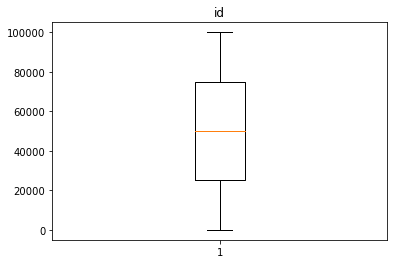

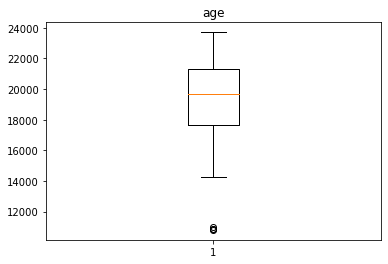

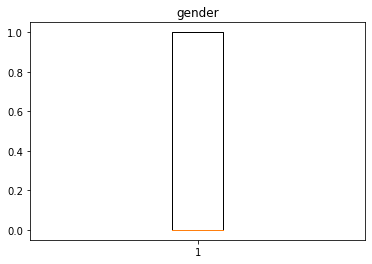

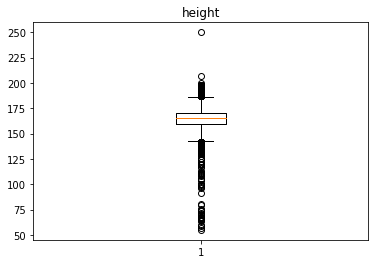

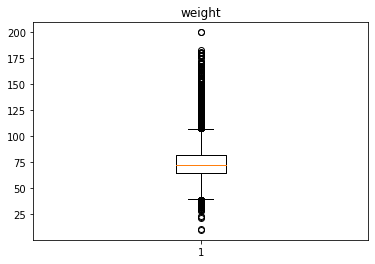

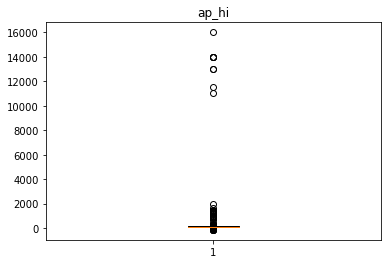

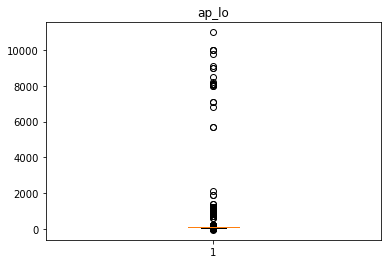

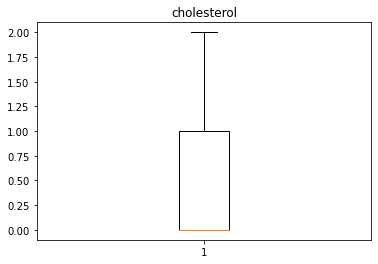

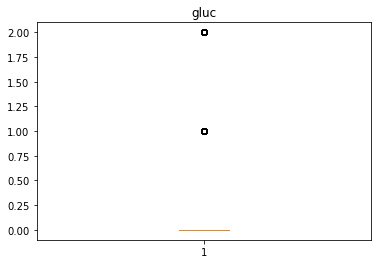

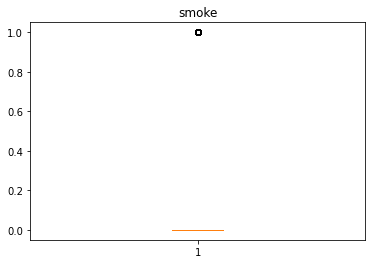

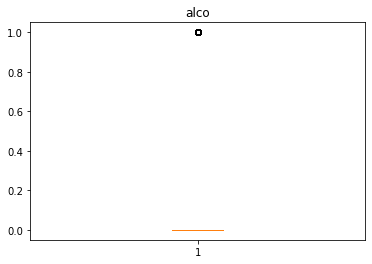

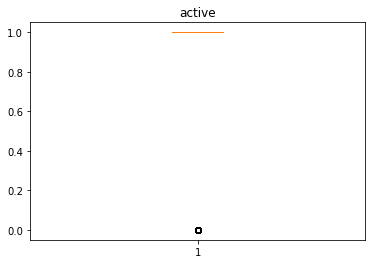

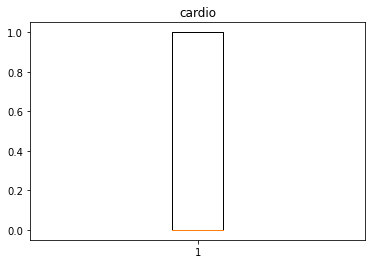

In [9]:
for col in dataset.columns :
    # Multiple box plots on one Axes
    data = dataset[col]
    if col in categorical_cols :
        data = data.astype("category").cat.codes
    fig, ax = plt.subplots()
    ax.boxplot(data)
    ax.set_title(col)

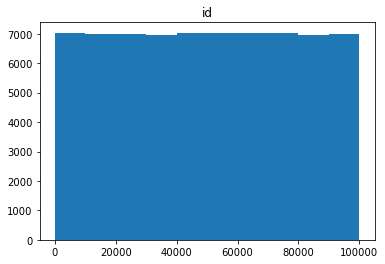

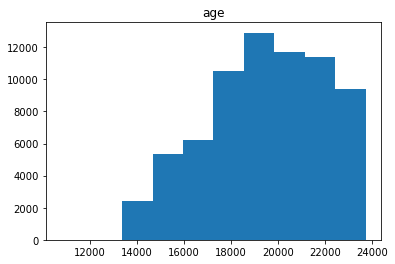

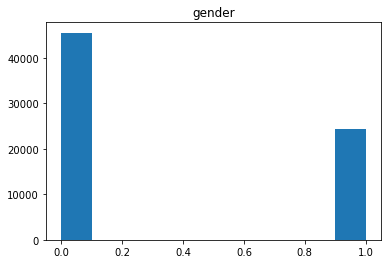

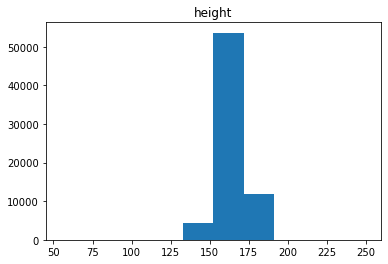

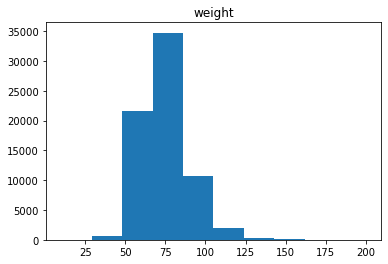

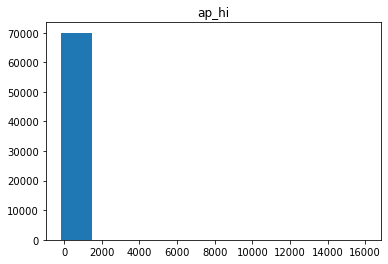

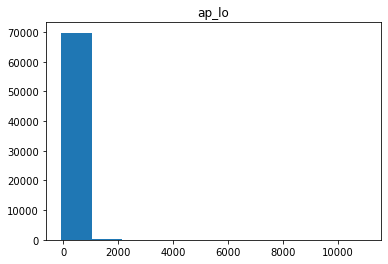

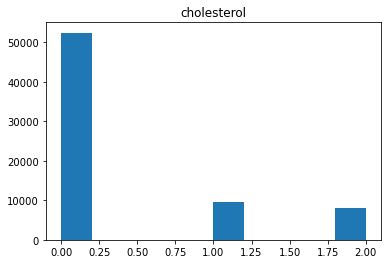

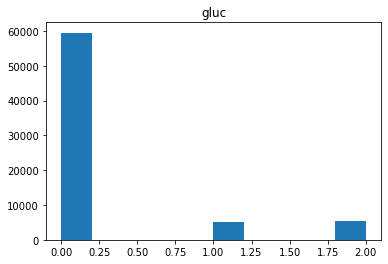

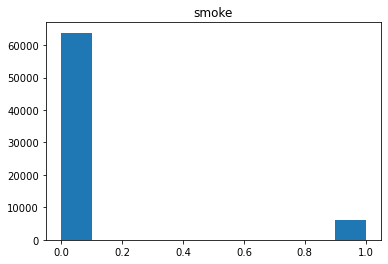

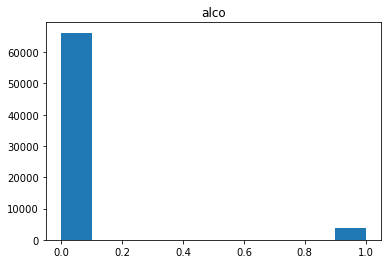

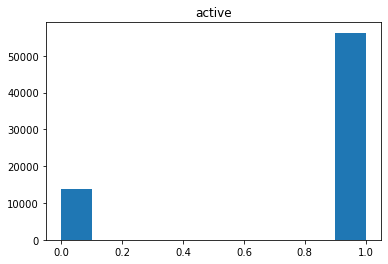

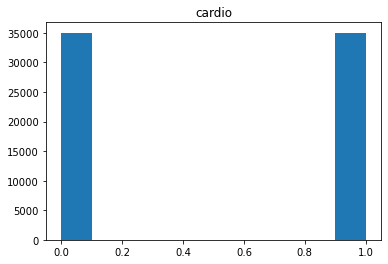

In [10]:
for col in dataset.columns :
    # Multiple box plots on one Axes
    data = dataset[col]
    if col in categorical_cols :
        data = data.astype("category").cat.codes
    fig, ax = plt.subplots()
    ax.hist(data, density=False, histtype='bar')
    ax.set_title(col)

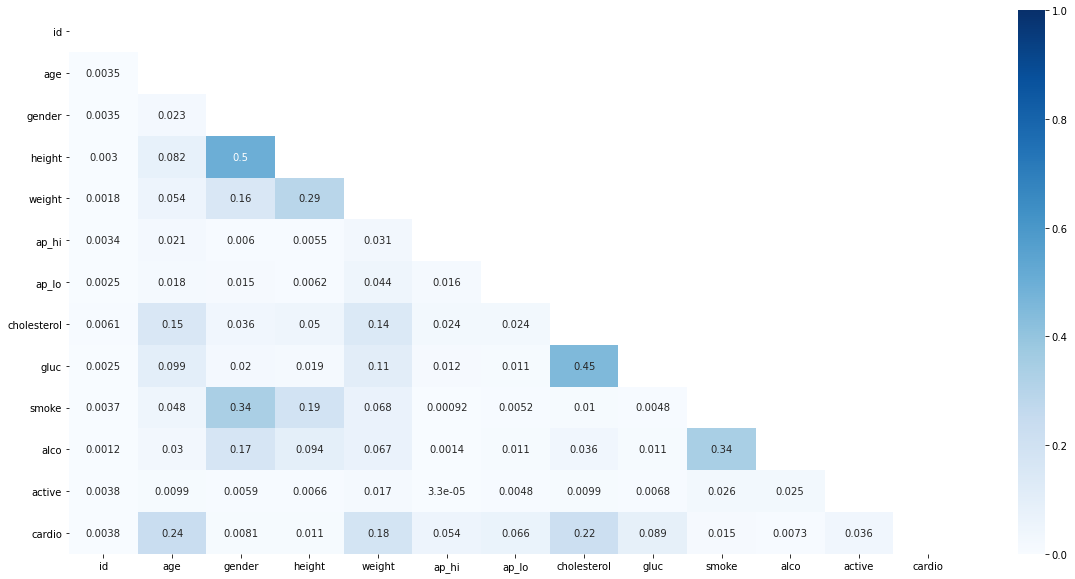

In [11]:
#Correlation matrix
set_option('precision', 2)
pyplot.figure(figsize=(20,10))
cors = abs(dataset.corr(method='pearson'))
seaborn.heatmap(cors, mask=np.triu(np.ones_like(cors, dtype=bool)), vmin=0, vmax=1, cmap='Blues', annot=True)
pyplot.show()

## 4. Edit data

In [12]:
for col in dataset.columns :
    if not dataset[col].isnull().values.any() :
        print(col, ':', 'NO NaN values')
    else :
        print(col, ':', 'NaN values finded')
        print('Number of NaN values: ', dataset[col].isnull().sum())

id : NO NaN values
age : NO NaN values
gender : NO NaN values
height : NO NaN values
weight : NO NaN values
ap_hi : NO NaN values
ap_lo : NO NaN values
cholesterol : NO NaN values
gluc : NO NaN values
smoke : NO NaN values
alco : NO NaN values
active : NO NaN values
cardio : NO NaN values


In [13]:
#quick look at the breakdown of class values
for col in categorical_cols :
    dataset[col] = dataset[col].astype('category')
    print('###########################')
    print(dataset.groupby(col).size())

###########################
gender
1    45530
2    24470
dtype: int64
###########################
cholesterol
1    52385
2     9549
3     8066
dtype: int64
###########################
gluc
1    59479
2     5190
3     5331
dtype: int64
###########################
smoke
0    63831
1     6169
dtype: int64
###########################
alco
0    66236
1     3764
dtype: int64
###########################
active
0    13739
1    56261
dtype: int64
###########################
cardio
0    35021
1    34979
dtype: int64


## 5. Data split (train and test)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Split data indixes in train and test
idx_train, idx_test = train_test_split(dataset.index.tolist(), train_size=0.8, random_state=42, shuffle=True)
print('Train data length: ', len(idx_train))
print('Test data length: ', len(idx_test))
print('Total data length: ', len(idx_train) + len(idx_test))

Train data length:  56000
Test data length:  14000
Total data length:  70000


In [16]:
#Select train data and save locally
train_data = dataset.loc[idx_train]
train_data.to_csv(HOME_PATH + 'TRAIN DATASETS/B_Cardio_Data_Real_Train.csv', index=False)
#Select test data and save locally
test_data = dataset.loc[idx_test]
test_data.to_csv(HOME_PATH + 'TEST DATASETS/B_Cardio_Data_Real_Test.csv', index=False)
print('Train data size: ', train_data.shape)
print('Test data length: ', test_data.shape)

Train data size:  (56000, 13)
Test data length:  (14000, 13)
